First, download the code and install the environment. Here we are going to do it through pip and use the sources from gitlab because conda takes a very long time to resolve the environment in Colab for some reason:

In [1]:
!git clone https://gitlab.com/dunloplab/delta.git

fatal: destination path 'delta' already exists and is not an empty directory.


Jia found that we need to add the following code to get the proper versions of Python and python-bioformats to work together:

In [2]:
## notes from Jia Lu 4/12/2023
## this fixes the issue — run this code before installing python-bioformats

import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
!apt-get install build-essential python3-dev
!apt-get install python3-pil python3-pygraphviz
!apt install openjdk-11-jdk
!pip3 install javabridge --no-cache-dir
!pip3 install python-weka-wrapper3 --no-cache-dir
import weka.core.jvm as jvm
jvm.start()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.8.2-0ubuntu2).
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pygraphviz is already the newest version (1.5-4build1).
python3-pil is already the newest version (7.0.0-4ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.18+10-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simpl

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.9/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.9/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.9/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.9/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.9/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


Install the required libraries with pip (+python-bioformats to read nd2s etc):
> *(if the following cell produces an error message about folium and imgaug it can be safely ignored)*

In [3]:
!pip install -r delta/requirements.txt
!pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Add the delta folder to the python path:

In [4]:
import sys
sys.path.append('/content/delta')

Import DeLTA:

In [5]:
import delta

/content/delta/delta/data.py:28: UserWarning: Could not load elastic deformations module.
  warnings.warn("Could not load elastic deformations module.")


Download latest models:

In [6]:
## Download latest models:
delta.assets.download_assets(
    load_models=True,
    load_sets=False,
    load_evals=False,
    config_level='global'
)


Models will be downloaded to /content/delta/delta/assets/models
Config files written to /content/delta/delta/assets/config


Extra imports and misc function definitions:

In [7]:
# To download files to your local drive:
from google.colab.files import download as colab_download
from google.colab.files import upload as colab_upload

# To display results movies:
from IPython.display import HTML
from base64 import b64encode

def display_movie(filename):
  mp4 = open(filename,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url
  )

## Mount my Google Drive to get access to results.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Analyze data

Let's follow the tutorials here:
https://delta.readthedocs.io/en/latest/usage/analysis.html
https://delta.readthedocs.io/en/latest/usage/outputs.html

In [9]:
resultsdir = "/content/drive/MyDrive/DeLTA-test-results/"

In [13]:
from delta.pipeline import load_position

mypicklefile = resultsdir + 'Position000000.pkl'
print(mypicklefile)

pos = load_position(filename=mypicklefile)

/content/drive/MyDrive/DeLTA-test-results/Position000000.pkl


In [15]:
import pprint

In [19]:
lin = pos.rois[0].lineage
first_cells = lin.cellnumbers[0]

In [26]:
print(lin.cellnumbers)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103], [1, 0, 104, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 15, 16, 17, 18, 108, 20, 19, 21, 22, 23, 24, 25, 26, 28, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 105, 38, 39, 40, 41, 42, 43, 45, 44, 46, 47, 48, 50, 53, 52, 56, 54, 55, 57, 58, 106, 59, 60, 109, 61, 62, 63, 64, 65, 66, 67, 69, 70, 68, 72, 71, 73, 74, 75, 76, 77, 78, 107, 79, 81, 80, 82, 83, 85, 84, 87, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 96, 98, 99, 100, 101, 102, 103], [0, 104, 1, 2, 4, 5, 6, 8, 7, 10, 9, 12, 14, 13, 15, 17, 16, 18, 108, 20, 19, 21, 22, 23, 24, 28, 25, 26, 110, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 10

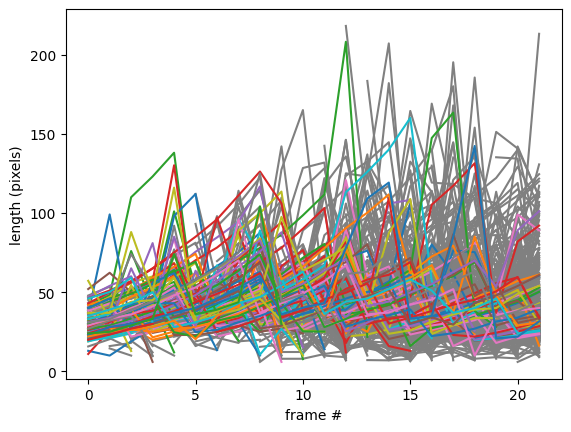

In [20]:
import matplotlib.pyplot as plt

for cell in lin.cells:
    if cell['id'] not in first_cells:
        plt.plot(cell['frames'],cell['length'],color=[.5,.5,.5])

for cnb in first_cells:
    cell = lin.cells[cnb]
    plt.plot(cell['frames'],cell['length'])

plt.xlabel('frame #')
plt.ylabel('length (pixels)')
plt.show()

In [21]:
def which_first(lineage, cell_nb, first_cells):

    # Get cell dict:
    cell = lineage.cells[cell_nb]

    # If orphan or reached one of the first two cells:
    if cell['mother'] is None or cell['mother'] in first_cells:
        return cell['mother']

    # Otherwise go up the lineage tree:
    else:
        return which_first(lineage, cell['mother'], first_cells)

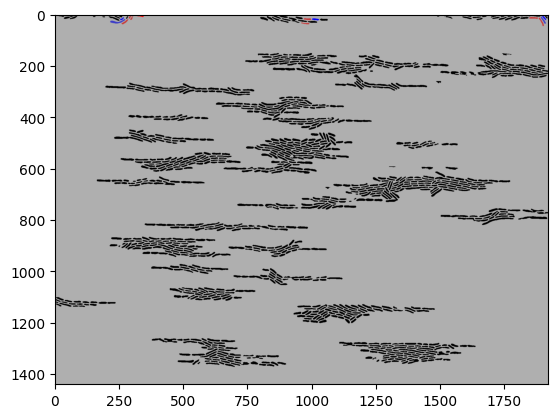

In [24]:
import numpy as np

# Last labels frame:
labels = pos.rois[0].label_stack[-1]

# Initialize color image (all light gray)
color_image = np.full(
    shape=labels.shape+(3,),
    fill_value=175,
    dtype=np.uint8
    )

# Go over cells in last frame:
for cnb in lin.cellnumbers[-1]:

    # Which initial cell is ancestor?
    ancestor = which_first(lin, cnb, first_cells)

    # Pick color based on ancestor:
    if ancestor is None:
        if cnb==0:
            color=[255,0,0]
        elif cnb==1:
            color=[0,0,255]
        else:
            color=[0,0,0]
    elif ancestor==0:
        color=[200,60,60]
    elif ancestor==1:
        color=[60,60,200]

    # Color in the cell:
    for c, val in enumerate(color):
        color_image[:,:,c][labels==cnb+1]=val

plt.imshow(color_image)
plt.show()

In [28]:
from scipy.io import loadmat

reloaded = loadmat(resultsdir + 'Position000000.mat',simplify_cells=True)

In [35]:
# Function to count number of generations:
def generation(lineage, cell_nb):

    if lineage[cell_nb-1]['mother']==0:
        return 0
    else:
        return generation(lineage, lineage[cell_nb-1]['mother']) +1

In [48]:
import numpy as np
import matplotlib.cm as cmap

## IMPORTANT: LOOKING AT A RANDOM FRAME HERE.
frame = 10 # Some random frame
imshape = tuple(reloaded['moviedimensions'][0:2])

# Init colored image:
color_image = np.full(
    shape = imshape + (3,),
    fill_value=255,
    dtype = np.uint8
    )

# Colormap for the generations:
colormap = cmap.get_cmap('plasma',lut=5)

<ipython-input-48-ee0c606759fc>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cmap.get_cmap('plasma',lut=5)


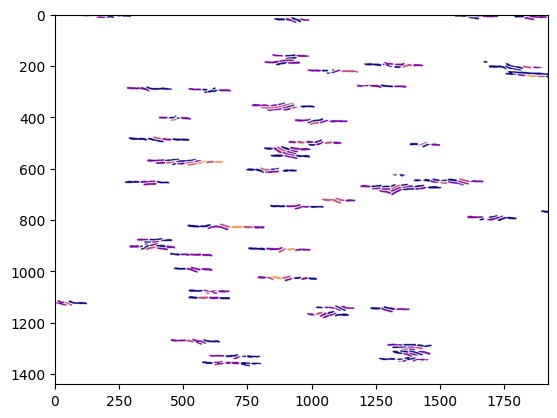

In [50]:
## There is one ROI / chamber in these data.
roi_pos = reloaded['proc']['chambers']

# ROI lineage:
lin = reloaded['res']['lineage']

# Labels image for frame:
labels = reloaded['res']['labelsstack_resized'][frame]

# Cells present in frame:
cells = np.unique(labels)[1:]

# Go over each cell:
for cell in cells:
    # Get generation and color:
    cell_gen = generation(lin, cell)
    color = colormap(cell_gen)

    # Draw cell:
    pixels = np.where(labels==cell)
    for c, val in enumerate(color[0:3]):
      color_image[
        pixels[0]+int(roi_pos[1]),
        pixels[1]+int(roi_pos[0]),
        c
      ]=val*255

plt.imshow(color_image)
plt.show()

## Calculate growth rates and variance in the growth rates.
Growth rates in terms of area and growth rates in terms of length are NOT present in the MAT file, this is an inconsistency with the documentation  of this data structure at:
https://delta.readthedocs.io/en/latest/usage/outputs.html#mat-file

# TODO: calculate growth rates and variances in the growth rates.